In [3]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


In [7]:
pip install dask

In [4]:
import dask.dataframe as dd

# Dask를 사용하여 Parquet 파일 읽기
df = dd.read_parquet('open/신용카드데이터.parquet')

# '기준년월'이 08인 행만 필터링
df_filtered = df[df['기준년월'] == 201809]

# 결과를 pandas DataFrame으로 변환
df_filtered = df_filtered.compute()

In [6]:
df_filtered.head(5)

,기준년월,ID,소지카드수_이용가능_신용,소지카드수_유효_신용,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,...,청구금액_R3M,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M
800000,201809,TRAIN_000000,1,1,0,0,0,0,0,868,...,43715,15732,1회 이상,889,1200,1636,756,697,997,10회 이상
800001,201809,TRAIN_000001,1,1,0,0,0,0,0,8745,...,12473,3428,1회 이상,2787,2994,3181,2622,3138,2571,1회 이상
800002,201809,TRAIN_000002,1,1,1,1,0,0,0,18657,...,72377,27320,1회 이상,5820,6074,6082,5878,6781,5618,1회 이상
800003,201809,TRAIN_000003,2,2,1,1,0,0,0,2691,...,51656,17247,1회 이상,761,849,732,1154,755,857,10회 이상
800004,201809,TRAIN_000004,1,1,1,1,0,0,0,8116,...,0,0,1회 이상,0,330,0,0,0,0,1회 이상


In [11]:
# 불필요한 컬럼을 드롭
train_df = df_filtered.drop(['소지카드수_이용가능_신용', '소지카드수_유효_신용'], axis=1)

# 결과 확인
train_df.head()

,기준년월,ID,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,...,청구금액_R3M,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M
800000,201809,TRAIN_000000,0,0,0,0,0,868,868,3948,...,43715,15732,1회 이상,889,1200,1636,756,697,997,10회 이상
800001,201809,TRAIN_000001,0,0,0,0,0,8745,8745,8870,...,12473,3428,1회 이상,2787,2994,3181,2622,3138,2571,1회 이상
800002,201809,TRAIN_000002,1,1,0,0,0,18657,18657,21833,...,72377,27320,1회 이상,5820,6074,6082,5878,6781,5618,1회 이상
800003,201809,TRAIN_000003,1,1,0,0,0,2691,2691,4064,...,51656,17247,1회 이상,761,849,732,1154,755,857,10회 이상
800004,201809,TRAIN_000004,1,1,0,0,0,8116,6377,3616,...,0,0,1회 이상,0,330,0,0,0,0,1회 이상


In [13]:
# train 데이터를 복제한다.
train_df2 = train_df.copy()

In [31]:
# 인코딩할 범주형 컬럼 목록
categorical_columns = [
    '이용금액대',  '이용가능여부_해외겸용_본인', '보유여부_해외겸용_본인',
    '상향가능한도금액', '상향가능CA한도금액', '할인건수_R3M',
    '인입횟수_ARS_R6M', '수신거부여부_TM', '수신거부여부_메일', 
    '수신거부여부_DM'
]

# 각 범주형 컬럼을 인코딩
for col in categorical_columns:
    train_df2[col] = train_df2[col].factorize()[0]

# 결과 확인
train_df2.head()

,기준년월,ID,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,...,청구금액_R3M,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M
800000,201809,TRAIN_000000,0,0,0,0,0,868,868,3948,...,43715,15732,0,889,1200,1636,756,697,997,0
800001,201809,TRAIN_000001,0,0,0,0,0,8745,8745,8870,...,12473,3428,0,2787,2994,3181,2622,3138,2571,1
800002,201809,TRAIN_000002,1,1,0,0,0,18657,18657,21833,...,72377,27320,0,5820,6074,6082,5878,6781,5618,1
800003,201809,TRAIN_000003,1,1,0,0,0,2691,2691,4064,...,51656,17247,0,761,849,732,1154,755,857,0
800004,201809,TRAIN_000004,1,1,0,0,0,8116,6377,3616,...,0,0,0,0,330,0,0,0,0,1


In [33]:
# 컬럼 이름 확인
print(train_df2.columns)

Index(['기준년월', 'ID', '이용가능여부_해외겸용_본인', '보유여부_해외겸용_본인', '수신거부여부_TM',
       '수신거부여부_메일', '수신거부여부_DM', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액',
       '이용카드수_신용체크', '_2순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용건수', '이용카드수_신용',
       '상향가능한도금액', '상향가능CA한도금액', '정상청구원금_B5M', '정상청구원금_B0M', '정상청구원금_B2M',
       '이용금액_일시불_R12M', '이용금액_일시불_B0M', '이용금액_오프라인_B0M', '이용금액_일시불_R6M',
       '이용금액_일시불_R3M', '정상입금원금_B5M', '정상입금원금_B0M', '이용금액_오프라인_R3M',
       '이용금액_오프라인_R6M', '정상입금원금_B2M', '_3순위업종_이용금액', '_2순위업종_이용금액',
       '이용건수_신용_R12M', '_2순위쇼핑업종_이용금액', '최대이용금액_일시불_R12M', '이용건수_신판_R12M',
       '이용건수_일시불_R12M', '_1순위업종_이용금액', '_3순위쇼핑업종_이용금액', '이용가맹점수',
       '이용건수_오프라인_B0M', '이용건수_오프라인_R6M', '이용건수_오프라인_R3M', '쇼핑_도소매_이용금액',
       '이용건수_신용_R6M', '이용건수_신용_B0M', '이용건수_신용_R3M', '이용건수_신판_R6M',
       '이용건수_신판_B0M', '이용건수_신판_R3M', '이용건수_일시불_R6M', '이용건수_일시불_B0M',
       '이용건수_일시불_R3M', '_1순위교통업종_이용금액', '연체입금원금_B0M', '쇼핑_마트_이용금액',
       '쇼핑_슈퍼마켓_이용금액', '교통_주유이용금액', '이용금액_온라인_B0M', '연체입금원금_B5M', '연체입금원금_B2

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# '기준년월'과 'ID' 컬럼 제외한 나머지 컬럼을 선택
vif_X = train_df2.drop(['기준년월', 'ID'], axis=1)

# 상수항 추가 (VIF 계산을 위한 준비)
vif_X2 = sm.add_constant(vif_X)

# VIF 계산
vif = pd.DataFrame()
vif['변수'] = vif_X2.columns
vif['VIF'] = [variance_inflation_factor(vif_X2.values, i) for i in range(vif_X2.shape[1])]

# 결과 출력
vif

,변수,VIF
0,const,54.875182
1,이용가능여부_해외겸용_본인,7.599017
2,보유여부_해외겸용_본인,7.302047
3,수신거부여부_TM,3.432162
4,수신거부여부_메일,12.948049
...,...,...
70,평잔_일시불_3M,17.566830
71,잔액_일시불_B0M,24.032383
72,잔액_일시불_B1M,19.971851
73,잔액_일시불_B2M,10.726746


In [47]:
# pandas 출력 옵션 설정
pd.set_option('display.max_rows', None)  # 모든 행을 출력

# VIF 값을 기준으로 내림차순 정렬
vif_sorted = vif.sort_values(by='VIF', ascending=False)

# VIF 결과 출력
print(vif_sorted)

                    변수            VIF
48         이용건수_신판_R3M  131662.027943
47         이용건수_신판_B0M  105555.252582
46         이용건수_신판_R6M  102484.343562
34        이용건수_신판_R12M   98374.191029
45         이용건수_신용_R3M   88733.972675
31        이용건수_신용_R12M   82767.594622
43         이용건수_신용_R6M   82502.327504
44         이용건수_신용_B0M   74309.972486
51        이용건수_일시불_R3M   41856.714096
50        이용건수_일시불_B0M   31019.900391
49        이용건수_일시불_R6M   19349.496151
35       이용건수_일시불_R12M   14130.154874
23        이용금액_일시불_R3M     170.400769
20        이용금액_일시불_B0M     149.789722
41       이용건수_오프라인_R3M     149.594654
17          정상청구원금_B0M     127.955036
39       이용건수_오프라인_B0M     117.904594
18          정상청구원금_B2M     105.400238
7          이용금액_R3M_신용     103.645071
25          정상입금원금_B0M      86.075850
8           _1순위카드이용금액      75.708786
11          _1순위카드이용건수      69.833174
28          정상입금원금_B2M      68.731577
16          정상청구원금_B5M      68.717490
0                const      54.875182
24          

In [62]:
# VIF 결과를 CSV 파일로 저장 (UTF-8 인코딩)
vif_sorted.to_csv('open/data/vif_sorted_results.csv', index=False, encoding='utf-8-sig')


### 추가 VIF 1

In [15]:
# train 데이터를 복제한다.
train_df3 = train_df2.copy()

In [77]:
# '기준년월'과 'ID' 컬럼 제외한 나머지 컬럼을 선택
vif_X = train_df3.drop(['기준년월', 'ID', 
                       '이용건수_신판_R6M', '이용건수_신판_B0M', '이용건수_신판_R3M',
                       '이용건수_신용_R6M', '이용건수_신용_B0M', '이용건수_신용_R3M',
                       '이용건수_일시불_R6M', '이용건수_일시불_B0M', '이용건수_일시불_R3M',
                       '이용금액_일시불_B0M', '이용금액_일시불_R6M', '이용금액_일시불_R3M',
                       '이용건수_오프라인_R6M', '이용건수_오프라인_R3M',
                       '정상청구원금_B0M', '정상청구원금_B2M',
                       '정상입금원금_B2M', '정상입금원금_B5M',
                       '청구금액_R3M', '청구금액_B0',
                       '월중평잔_일시불',
                       '_2순위업종_이용금액', '_2순위쇼핑업종_이용금액', '_1순위업종_이용금액', '_3순위쇼핑업종_이용금액', '_1순위교통업종_이용금액', '_1순위쇼핑업종_이용금액',
                       '잔액_일시불_B1M', '잔액_일시불_B2M',
                       '연체입금원금_B5M', '연체입금원금_B2M',
                       '평잔_일시불_3M'
                        ], axis=1)

# 상수항 추가 (VIF 계산을 위한 준비)
vif_X2 = sm.add_constant(vif_X)

# VIF 계산
vif = pd.DataFrame()
vif['변수'] = vif_X2.columns
vif['VIF'] = [variance_inflation_factor(vif_X2.values, i) for i in range(vif_X2.shape[1])]

# pandas 출력 옵션 설정
pd.set_option('display.max_rows', None)  # 모든 행을 출력

# VIF 값을 기준으로 내림차순 정렬
vif_sorted = vif.sort_values(by='VIF', ascending=False)

# VIF 결과 출력
print(vif_sorted)

                    변수           VIF
25        이용건수_신판_R12M  14807.470723
23        이용건수_신용_R12M  11516.298081
26       이용건수_일시불_R12M   2956.835911
7          이용금액_R3M_신용    100.008773
8           _1순위카드이용금액     61.588099
0                const     53.014724
20       이용금액_오프라인_R3M     36.087462
10          _2순위카드이용금액     30.575737
18       이용금액_오프라인_B0M     30.558379
11          _1순위카드이용건수     28.814511
27              이용가맹점수     28.386011
28       이용건수_오프라인_B0M     27.140766
17       이용금액_일시불_R12M     20.006149
12          _2순위카드이용건수     15.668872
5            수신거부여부_DM     15.537952
40        월중평잔_일시불_B0M     15.066674
6        이용금액_R3M_신용체크     15.025758
41          잔액_일시불_B0M     13.055577
4            수신거부여부_메일     12.940177
13            이용카드수_신용     12.696885
9           이용카드수_신용체크     11.038701
16          정상청구원금_B5M     10.068433
34        이용금액_온라인_B0M      7.937343
21       이용금액_오프라인_R6M      7.794215
1       이용가능여부_해외겸용_본인      7.518889
2         보유여부_해외겸용_본인      7.218859
1

### 추가 VIF 2

In [37]:
# train 데이터를 복제한다.
train_df4 = train_df3.copy()

In [41]:
print(vif_X.dtypes)

이용가능여부_해외겸용_본인                  int64
보유여부_해외겸용_본인                    int64
수신거부여부_TM                       int64
수신거부여부_메일                       int64
수신거부여부_DM                       int64
이용금액_R3M_신용체크                   int64
이용금액_R3M_신용                     int64
_1순위카드이용금액                      int64
이용카드수_신용체크                      int64
_2순위카드이용금액                      int64
_2순위카드이용건수                      int64
이용카드수_신용                        int64
상향가능한도금액                        int64
상향가능CA한도금액                      int64
정상청구원금_B5M                      int64
이용금액_일시불_R12M                   int64
이용금액_일시불_B0M                    int64
이용금액_오프라인_B0M                   int64
이용금액_일시불_R6M                    int64
이용금액_일시불_R3M                    int64
정상입금원금_B0M                      int64
이용금액_오프라인_R3M                   int64
이용금액_오프라인_R6M                   int64
_3순위업종_이용금액                     int64
이용건수_신용_R12M                    int64
최대이용금액_일시불_R12M                 int64
이용건수_일시불_R12

In [42]:

# '기준년월'과 'ID' 컬럼을 제외한 나머지 컬럼을 선택
vif_X = train_df4.drop(['기준년월', 'ID', 
                        '이용건수_신판_R6M', '이용건수_신판_B0M', '이용건수_신판_R3M', '이용건수_신판_R12M',
                        '이용건수_신용_R6M', '이용건수_신용_B0M', '이용건수_신용_R3M',
                        '이용건수_일시불_R6M', '이용건수_일시불_B0M', '이용건수_일시불_R3M',
                        '이용건수_오프라인_R6M', '이용건수_오프라인_R3M','이용건수_오프라인_B0M', '이용건수_오프라인_R6M', '이용건수_오프라인_R3M',
                        '이용건수_일시불_B0M', '이용건수_일시불_R6M', '이용건수_일시불_R3M',
                        '정상청구원금_B0M', '정상청구원금_B2M',
                        '정상입금원금_B2M', '정상입금원금_B5M',
                        '청구금액_R3M', '청구금액_B0',
                        '월중평잔_일시불',
                        '_2순위업종_이용금액', '_2순위쇼핑업종_이용금액', '_1순위업종_이용금액', '_3순위쇼핑업종_이용금액', '_1순위교통업종_이용금액', '_1순위쇼핑업종_이용금액',
                        '_1순위카드이용건수',
                        '잔액_일시불_B1M', '잔액_일시불_B2M',
                        '연체입금원금_B5M', '연체입금원금_B2M',
                        '평잔_일시불_3M'
                       ], axis=1)


# 상수항 추가 (VIF 계산을 위한 준비)
vif_X2 = sm.add_constant(vif_X)

# VIF 계산
vif = pd.DataFrame()
vif['변수'] = vif_X2.columns
vif['VIF'] = [variance_inflation_factor(vif_X2.values, i) for i in range(vif_X2.shape[1])]

# pandas 출력 옵션 설정
pd.set_option('display.max_rows', None)  # 모든 행을 출력

# VIF 값을 기준으로 내림차순 정렬
vif_sorted = vif.sort_values(by='VIF', ascending=False)

# VIF 결과 출력
print(vif_sorted)


KeyboardInterrupt

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq\\backend\\cython\\checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


KeyboardInterrupt: 

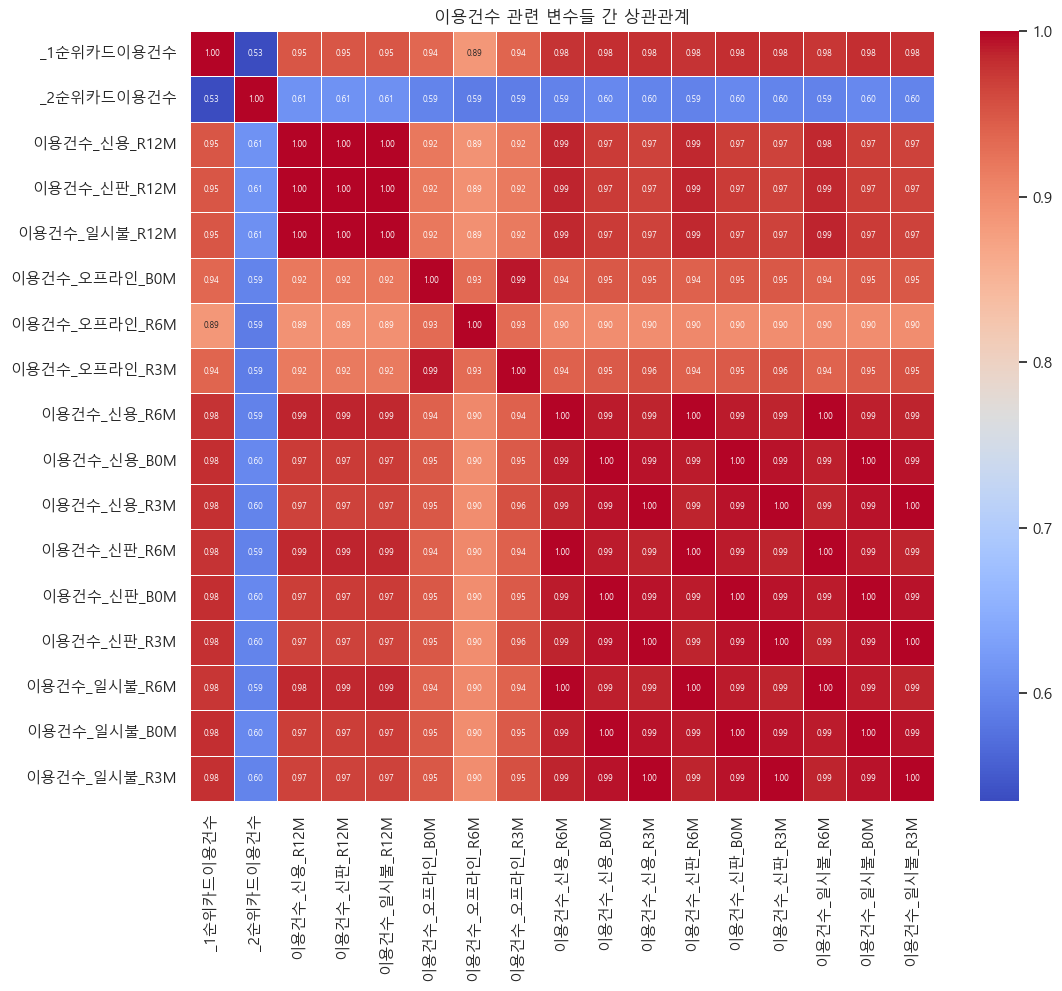

In [66]:
# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 6})
plt.title('이용건수 관련 변수들 간 상관관계')
plt.show()

In [ ]:
# 상관관계 행렬에서 값이 1인 항목만 추출
correlation_1 = corr_matrix[corr_matrix == 1]

# 결과 출력
print(correlation_1)